In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from math import cos

In [2]:
def fun(t, z, omega):
    """
    Right hand side of the differential equations
      dx/dt = -omega * y
      dy/dt = omega * x
    """
    δ, α, β, γ, ω = omega                          
    x, y = z
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]
    return f

In [3]:
# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dop853'.
solver = ode(fun)
solver.set_integrator('dopri5')

In [4]:
# Give the value of omega to the solver. This is passed to
# `fun` when the solver calls it.
#omega = 2 * np.pi
#solver.set_f_params(omega)

In [5]:
γ = 0.65
α = -1.0        
δ = 0.3
β = 1.0
ω = 1.2

t1 = 50
N = 700

R=[0] * N
w=[0] * N
for i in range(0,N):
    aux = δ, α, β, γ, ω                      
    solver.set_f_params(aux)
    
    # Set the initial value z(0) = z0.
    t0 = 0.0
    z0 = [1, 0]
    solver.set_initial_value(z0, t0)
    
    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t = np.linspace(t0, t1, N)
    sol = np.empty((N, 2))
    sol[0] = z0

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[k], and save the solution in sol[k].
    k = 1
    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1
    
    w[i]=ω

In [6]:
T=[0] * N
for i in range (0,N):
    k = (t[i]) * (w[i]) / (2* np.pi)
    
    T[i]=k

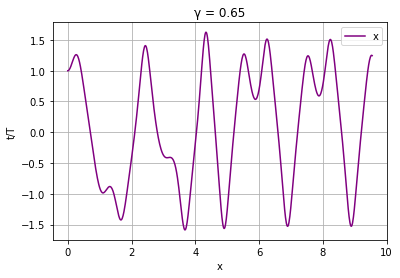

In [7]:
# Plot the solution...
plt.plot(T, sol[:,0], label="x", color="Purple")
plt.title("γ = 0.65")
plt.xlabel('x')
plt.ylabel('t/T')
plt.grid(True)
plt.legend()
plt.show()

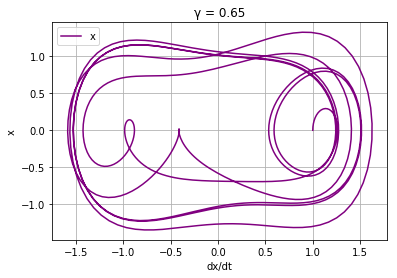

In [8]:
# Plot the solution...
plt.plot(sol[:,0], sol[:,1], label="x", color="Purple")
plt.title("γ = 0.65")
plt.xlabel('dx/dt')
plt.ylabel('x')
plt.grid(True)
plt.legend()
plt.show()